# INFO 1998   Final Project:           NBA players salary prediction
### By Zhen Lu and Kai Zou
## Introduction
Nowadays, the nba has been more and more commercialized. Players care more about their their salary. We are trying to predict their salary in the next season.
We predict that there is a positive relationship between PPG, RPG, APG, TS%, Minutes Played, PER and salary. Also, age is also a factor. The older a player is, higher salary there is for him. However when age is too old, salary decreases.
There are two datasets we want to use. The first one in the player stats from last season, 2017-2018, which is used to train the models and the dataset we use to predict the salary of is the data of current season, 2018-2019 up until december.

In [61]:
import numpy as np
import pandas as pd

In [62]:
data = pd.read_csv('nbaplayers1718.csv')

In [63]:
data.head()

,#,Season Start,Player Name,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,24304,2017,A.J. Hammons,C,24,DAL,22,0,163,8.4,...,8,28,36,4,1,13,10,21,48,1312611.0
1,24165,2017,Aaron Brooks,PG,32,IND,65,0,894,9.5,...,18,51,69,125,25,9,66,93,322,2116955.0
2,24289,2017,Aaron Gordon,SF,21,ORL,80,72,2298,14.4,...,116,289,405,150,64,40,89,172,1019,5504420.0
3,24315,2017,Aaron Harrison,SG,22,CHO,5,0,17,-2.2,...,0,3,3,3,0,0,0,2,1,NaN
4,24523,2017,Adreian Payne,PF,25,MIN,18,0,135,14.4,...,9,24,33,7,8,7,8,32,63,NaN


In [64]:
data = data.dropna(axis=0, subset=['Salary'])
data = data.fillna(0)

## Data Processing Part 1

While loading this dataset, I found that the Salary is written in Strings with a dollar sign. I fixed that problem by just going in to Excel and make a new column and tweak a little bit about the data type. Then, another problem is that a lot of data in this dataset is NaN. The salary is NaN because this player did not play in the NBA or got bought out so technically he did not earn salary.The best move is to delete from the dataset. Other stats, like 3pt shootings are NaN because he can be a center who do not know how to shoot a 3 pointer and never tried to do so in this season. Therefore, the best approach here is to simply fill that null data to zero because it means this player did not attempt on this field.

Then, a lot of features are quite complicated and I don't understand what it means. They are highly advanced NBA data which is closely related to the basic features that I chose below. Therefore, I chose to make a new dataframe to store those features and to calculate the per game stats since another dataset we use to work on, to actually predict the salary, also uses these pergame data.

In [65]:
df = pd.DataFrame()
df = data.filter(['Player Name','Age','Salary','TS%','3P%','FT%','FG%'])
GP = data["G"]
df['PPG'] = data['PTS']/GP
df['RPG'] = data['TRB']/GP
df['BPG'] = data['BLK']/GP
df['APG'] = data['AST']/GP
df['SPG'] = data['STL']/GP
df.head()

,Player Name,Age,Salary,TS%,3P%,FT%,FG%,PPG,RPG,BPG,APG,SPG
0,A.J. Hammons,24,1312611.0,0.472,0.500,0.450,0.405,2.181818,1.636364,0.590909,0.181818,0.045455
1,Aaron Brooks,32,2116955.0,0.507,0.375,0.800,0.403,4.953846,1.061538,0.138462,1.923077,0.384615
2,Aaron Gordon,21,5504420.0,0.530,0.288,0.719,0.454,12.737500,5.062500,0.500000,1.875000,0.800000
5,Al Horford,30,27734405.0,0.553,0.355,0.800,0.473,14.000000,6.823529,1.279412,4.955882,0.764706
6,Al Jefferson,32,9769821.0,0.526,0.000,0.765,0.499,8.106061,4.212121,0.242424,0.863636,0.287879


## Data Visualization 1 Scatter Plot
I created two visualizations. The first one is a scatter plot for age against salary. I used this to confirm my hypothesis above about the age and the salary thing. The result is quite clear. for players aged 19-23, they earn much less money since they have their rookie contract. However, when they reach 24-32, they some earn much more since they are at their prime and for players older than 33 yrs, their salary begin to drop significantly.

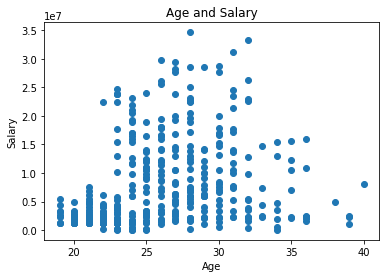

In [66]:
import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['Salary'])
plt.title('Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

## Visualization 2: Correlation Plot
This is created for the purpose of feature selection. To my surprise, the measures for efficiency, like FG%, which is the field goal percentage, FT% the freeshooting percentage is not quite correlated with salary. That makes sense since a lot of high salary star players have quite low efficiency as they have to shoot a lot tough shots. Examples are John Wall, Russell Westbrook or even Kobe Bryant, who is not part of the dataset. Also some high-paid center players like Deandre Jordan and Rudy Gobert do not have very high Free shooting rate, so I will disregard those features and only choose TS% as the efficiency measure.

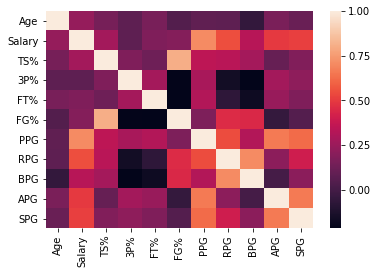

In [38]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [67]:
df.head()

,Player Name,Age,Salary,TS%,3P%,FT%,FG%,PPG,RPG,BPG,APG,SPG
0,A.J. Hammons,24,1312611.0,0.472,0.500,0.450,0.405,2.181818,1.636364,0.590909,0.181818,0.045455
1,Aaron Brooks,32,2116955.0,0.507,0.375,0.800,0.403,4.953846,1.061538,0.138462,1.923077,0.384615
2,Aaron Gordon,21,5504420.0,0.530,0.288,0.719,0.454,12.737500,5.062500,0.500000,1.875000,0.800000
5,Al Horford,30,27734405.0,0.553,0.355,0.800,0.473,14.000000,6.823529,1.279412,4.955882,0.764706
6,Al Jefferson,32,9769821.0,0.526,0.000,0.765,0.499,8.106061,4.212121,0.242424,0.863636,0.287879


In [71]:
features = ['Age', 'TS%','PPG','RPG','SPG','BPG','APG']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[features],df[['Salary']], 
                                                    test_size=0.15, random_state=42)